# Part I - FordGoBike Dataset Exploration
## by Moayad Al-Khezayem

## Introduction
> The dataset used for this project is about bikes rides collected by a shared system in San Francisco Bay area. We will use different analysis and visualization techniques to get helpful insights from this dataset.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
#Reading dataset
bikes_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bikes_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#Dataset strcture.
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


### What is the structure of your dataset?

> The datset has about 183k records and 16 variables.
> The 16 variables are: 
- duration_sec - int
- start_time   - str
- end_time     - str
- start_station_id - float
- start_station_name - str
- start_station_latitude - float
- start_station_longitude - float
- end_station_id - float
- end_station_name - str
- end_station_latitude - float
- end_station_longitude - float
- bike_id - int
- user_type - str
- member_birth_year - float
- member_gender - str
- bike_share_for_all_trip - str

### What is/are the main feature(s) of interest in your dataset?

> The main features that we will foucs on is 'duration_sec', 'member_gender', 'start_station_name', 'end_station_name' and 'member_birth_year'.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All the ids variables for stations and bikes would be helpful to distinct between different bikes and stations easily.

## Cleaning data

Fixing data types

In [11]:
#Make a copy of original data for cleaning.
bikes_df_cleaned = bikes_df.copy()

In [5]:
bikes_df_cleaned[['start_station_id', 'end_station_id']].head(5)

,start_station_id,end_station_id
0,21.0,13.0
1,23.0,81.0
2,86.0,3.0
3,375.0,70.0
4,7.0,222.0


In [6]:
#Too old library!
!pip show pandas

Name: pandas
Version: 0.23.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: http://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.6/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: vincent, seaborn, pymc3, altair


In [12]:
#For ids that are float, we change to int first to remove the trailing zeros then we change to string.
#Since the pandas libeary is too old we cant convert the float directly to str with ignoring nulls. For loop is needed.
cols = ['start_station_id', 'end_station_id']
for col in cols:
    bikes_df_cleaned[col] = bikes_df_cleaned[col].fillna(-1)
    bikes_df_cleaned[col] = bikes_df_cleaned[col].astype(int)
    bikes_df_cleaned[col] = bikes_df_cleaned[col].astype(str)
    bikes_df_cleaned[col] = bikes_df_cleaned[col].replace('-1', np.nan)

In [13]:
#Printint datatypes after fixing.
bikes_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(5), int64(2), object(9)
memory usage: 22.4+ MB


In [14]:
bikes_df_cleaned[['start_station_id', 'end_station_id']].head(5)

,start_station_id,end_station_id
0,21,13
1,23,81
2,86,3
3,375,70
4,7,222


In [15]:
#Checking for duplicates.
bikes_df_cleaned.duplicated().sum()

0

In [16]:
#Checking for nulls.
bikes_df_cleaned.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [17]:
bikes_df_cleaned.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,0.099581,0.117097,0.099490,0.116673,1664.383394,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000


In [18]:
#Data date.
bikes_df_cleaned.start_time.max()

'2019-02-28 23:59:18.5480'

> We can see outliers in 'member_birth_year' above, since the data seems at 2019 so we need to remove any users above 100 years since they are so old to ride a bike.

In [20]:
#Replcing false data with nan.
bikes_df_cleaned['member_birth_year'] = np.where(bikes_df_cleaned['member_birth_year'] < 1919, np.nan, bikes_df_cleaned['member_birth_year'])

In [21]:
#Check
(bikes_df_cleaned['member_birth_year'] < 1919).sum()

0

In [28]:
#Save a copy of cleaned data
bikes_df_cleaned.to_csv('bikes_df_cleaned.csv', index = False)

> Seems that we don't have any duplicate records and few records missing values which means that our dataset is ready for exploration phase.

## Univariate Exploration

### Univariate Question 1 - What's the disturbution of 'duration_sec' variable?

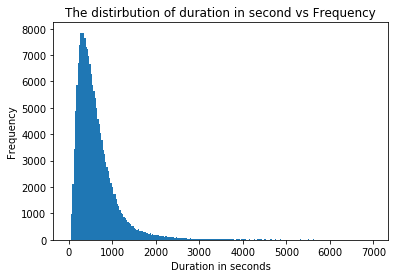

In [22]:
#Checking distirbution using histogram.
plt.hist(bikes_df_cleaned['duration_sec'], np.arange(0, 7000, 30))
plt.ylabel('Frequency')
plt.xlabel('Duration in seconds')
plt.title('The distirbution of duration in second vs Frequency');

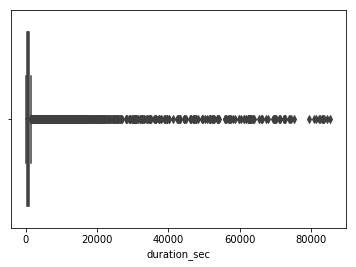

In [23]:
#Checking for distirbution using box plot.
sns.boxplot(bikes_df_cleaned['duration_sec']);

In [24]:
#The portion of datapoints not included in our histogram (outliers).
(bikes_df_cleaned[bikes_df_cleaned['duration_sec'] > 7000].shape[0] / bikes_df_cleaned.shape[0]) * 100

0.4007371382461344

Q1 - Observations:
- Majority of the bikes rental time is below 7000 seconds, the histogram is right skewed.
- The portion of data above 7000 seconds is 0.4%.

### Univariate Question 2 - What's the disturbution of 'member_gender' variable?

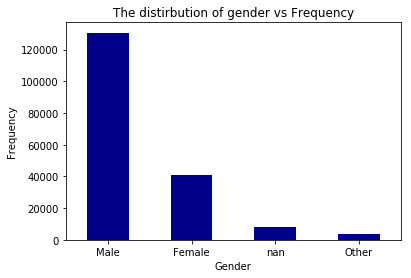

In [25]:
#Checking distirbution using histogram.
bikes_df_cleaned['member_gender'].value_counts(dropna = False).plot(kind = 'bar', color = 'darkblue')
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.title('The distirbution of gender vs Frequency');

In [26]:
#Gender values.
bikes_df_cleaned['member_gender'].value_counts(dropna = False)

Male      130651
Female     40844
NaN         8265
Other       3652
Name: member_gender, dtype: int64

In [27]:
#We can check for the mean trip time for each gender.
bikes_df_cleaned.groupby('member_gender')['duration_sec'].mean()

member_gender
Female    779.070390
Male      672.639069
Other     996.515334
Name: duration_sec, dtype: float64

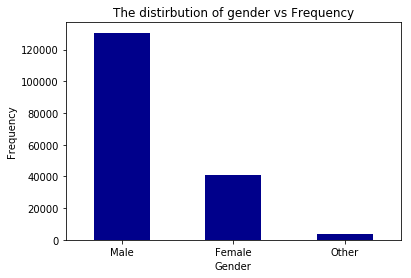

In [29]:
#Replot a polished copy of the previous visualization.
bikes_df_cleaned['member_gender'].value_counts().plot(kind = 'bar', color = 'darkblue')
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.title('The distirbution of gender vs Frequency');

Q2 - Observations:
- Majority of the bikes rented by males while females have less frequency.
- There're about 8200 values which have nan as gender.

### Univariate  Question 3 - What's the disturbution of 'start_station_name' variable?

In [5]:
#Creating function to plot bar so it can be used on both 'start_station_name' and end_station_name.
def barh(col, color_p_number, title):
    col.value_counts().head(20).sort_values().plot(kind = 'barh', figsize = (10,7), fontsize = 11,
                                                                         color = sns.color_palette()[color_p_number])
    plt.title(title)
    plt.show;

In [136]:
bikes_df_cleaned['start_station_name'].value_counts().head(20)

Market St at 10th St                                               3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3544
Berry St at 4th St                                                 3052
Montgomery St BART Station (Market St at 2nd St)                   2895
Powell St BART Station (Market St at 4th St)                       2760
San Francisco Ferry Building (Harry Bridges Plaza)                 2710
San Francisco Caltrain (Townsend St at 4th St)                     2703
Powell St BART Station (Market St at 5th St)                       2327
Howard St at Beale St                                              2293
Steuart St at Market St                                            2283
The Embarcadero at Sansome St                                      2082
Bancroft Way at Telegraph Ave                                      1796
Bancroft Way at College Ave                                        1770
2nd St at Townsend St                                           

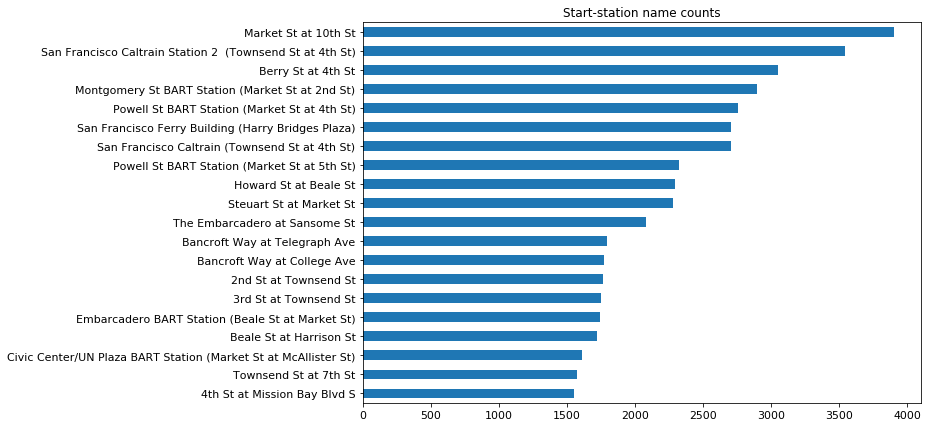

In [14]:
barh(bikes_df_cleaned['start_station_name'], 0, 'Start-station name counts')

Q3 - Observations:
- The bar chart is right skewed, which means the data is normal in this case, it would be abnormal if all stations has the same amount of trip since they differ in size and location.
- The top two start-stations with noticable difference than other stations are:
    - Market St at 10th St - 3904 frequency.
    - San Francisco Caltrain Station 2  (Townsend St at 4th St) - 3544 frequency.

### Univariate  Question 4 - What's the disturbution of 'end_station_name' variable?

In [29]:
bikes_df_cleaned['end_station_name'].value_counts().head(20)

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4857
Market St at 10th St                                               3973
Montgomery St BART Station (Market St at 2nd St)                   3647
San Francisco Ferry Building (Harry Bridges Plaza)                 3368
Powell St BART Station (Market St at 4th St)                       2997
San Francisco Caltrain (Townsend St at 4th St)                     2947
Berry St at 4th St                                                 2872
The Embarcadero at Sansome St                                      2512
Powell St BART Station (Market St at 5th St)                       2353
Steuart St at Market St                                            2338
Howard St at Beale St                                              2034
Civic Center/UN Plaza BART Station (Market St at McAllister St)    1865
Bancroft Way at Telegraph Ave                                      1814
Beale St at Harrison St                                         

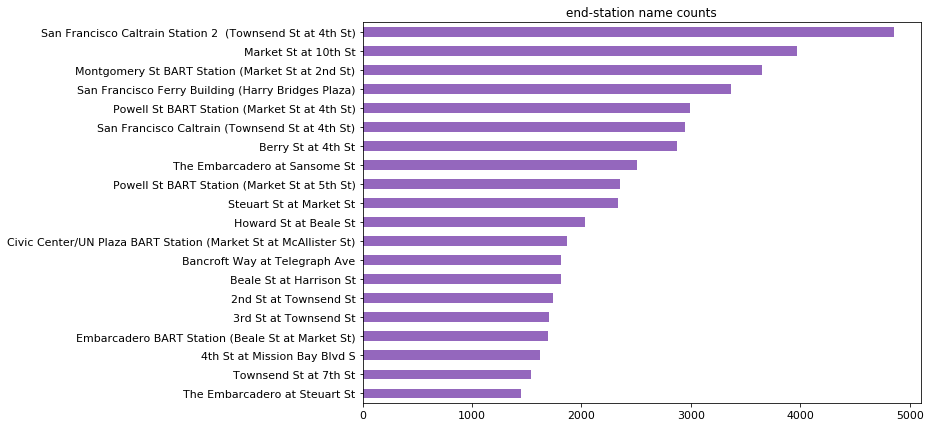

In [30]:
#Plotting bar chart.
barh(bikes_df_cleaned['end_station_name'], 4, 'end-station name counts')

In [42]:
#How many of top 20 start stations is also top 20 in end stations
bikes_df['start_station_name'].value_counts().head(20).index.isin(bikes_df['end_station_name'].value_counts().head(20).index).sum()

19

Q4 - Observations:
- The bar chart is right skewed, which means the data is normal in this case, it would be abnormal if all stations has the same amount of trip since they differ in size and location.
- The top 20 stations actually the same as the start stations except one station!

### Univariate  Question 5 - What's the disturbution of 'member_birth_year' variable?

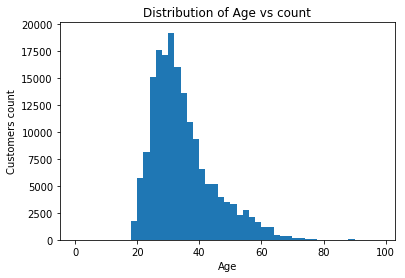

In [22]:
#Hist for age distirbution.
plt.hist(2019 - bikes_df_cleaned.dropna().member_birth_year, bins = np.arange(0, 100, 2))
plt.title('Distribution of Age vs count')
plt.xlabel('Age')
plt.ylabel('Customers count')
plt.show();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - We can see that in 'duration_sec' the data is clusterd between 0 and 1000 seconds which is normal, however the box plot in Q1 shows that there're values above 7000 seconds which is equivilant to more than two hours of trips.
> - In the variable 'member_gender' most of the values are males, with less than half females and small portion noted as (other), however this disirbution sounds a bit odd since the females not even half of the males rentals.
<br>
> - The 'start_station_name' variable disirbution is right skewed (as it expected to be), no outliers or odd distirbution is noted.
<br>
> - The 'end_station_name' variable disirbution is right skewed (as it expected to be), and it shares the top 20 stations with the variable 'start_station_name'. Also, no outliers or odd distirbution is noted.
<br>
> - The 'member_birth_year' shows that the most of our users falls between 20 y.o and 40 y.o.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. 'duration_sec': The data is normal, however, there was values can be noted as outliers with values from 20,000 seconds or (5.5 hours) to about 80,000 seconds or (22 hours) which is odd. But these values do not excced 100,000 seconds or (28 hours), that means there're outliers but not extremely odd or faulty to be removed.
> 2. 'member_gender': The distirbution sounds a bit odd for majority of data labeled as (male), but we cannot note it as outliers, no need for adjustment.
> 3. 'start_station_name': The distirbution of the data is noraml, and it share most of the top 20 stations with 'end_station_name'.
> 4. 'end_station_name': The distirbution of the data is noraml, and it share most of the top 20 stations with 'start_station_name'.
> 5. 'member_birth_day': The data is highly clusterd between 20 and 40 and it's right skewed.

## Bivariate Exploration


### Bivariate  Question 1 - How 'duration_sec' varies comparing with 'member_gender'?

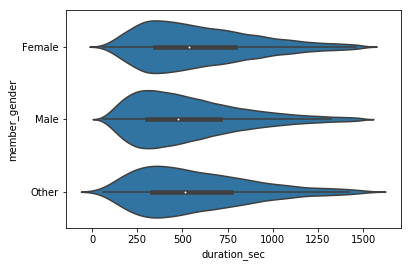

In [213]:
#As stated before the data in 'duration_sec' is clustred below 1000 so we filiter our violions accordingly.
filtered = bikes_df_cleaned.query('duration_sec < 1500')
sns.violinplot(y = 'member_gender', x = 'duration_sec', data = filtered, color = sns.color_palette()[0]);

Q1-Observation: Across all genders, the seconds distrbution is almost the same with slightly less 'duration_sec' median in (male).

### Bivariate  Question 2 - How 'duration_sec' varies comparing with 'member_birth_year'?

We can compare the stations with the seconds using the stations ids instead of the names to help make more general visualization!

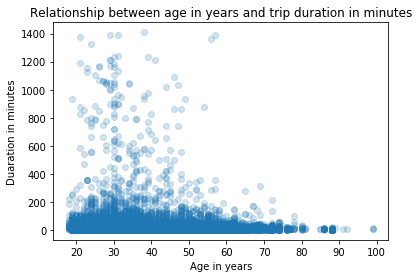

In [105]:
#Scatter plot for age and duration.
plt.scatter((2019 - bikes_df_cleaned.member_birth_year), bikes_df_cleaned['duration_sec'] / 60, alpha = 0.2);
plt.xlabel('Age in years');
plt.ylabel('Duaration in minutes');
plt.title('Relationship between age in years and trip duration in minutes');

plt.show();

Q2-Observation: We can see from the previous scatter plot that in younger ages, the bike trip increase while after 60 y.o, the bikes trips is very short in average.

### Bivariate  Question 3 - How 'member_gender' varies comparing with 'member_birth_year'?

In [108]:
#Building a histogram function to reduce repetitive code.
def hist_g(gender):
    (2019 - (bikes_df_cleaned[bikes_df_cleaned['member_gender'] == gender]['member_birth_year'])).plot(kind = 'hist', bins = np.arange(0, 100, 1))

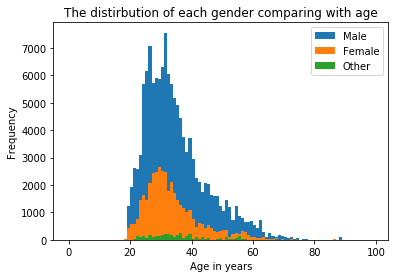

In [109]:
#Using the function for all genders in data.
for gender in bikes_df_cleaned.member_gender.value_counts().index:
    hist_g(gender)

plt.legend(['Male', 'Female', 'Other'])
plt.xlabel('Age in years')
plt.title('The distirbution of each gender comparing with age');

Q3-Observation: From the histogram above males clearly use bikes more often with higher frequency, and the distirbution for males look similar to females but not exactly. Other genders have different pattern with highest values around 35 to 40 y.o.

In [106]:
bikes_df_cleaned.corr()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year
duration_sec,1.000000,0.010513,-0.037930,0.010873,-0.038906,-0.006133,-0.006210
start_station_latitude,0.010513,1.000000,-0.677227,0.989969,-0.682637,0.049996,-0.075833
start_station_longitude,-0.037930,-0.677227,1.000000,-0.681815,0.992410,-0.141782,0.127377
end_station_latitude,0.010873,0.989969,-0.681815,1.000000,-0.684197,0.049244,-0.075958
end_station_longitude,-0.038906,-0.682637,0.992410,-0.684197,1.000000,-0.143527,0.128325
bike_id,-0.006133,0.049996,-0.141782,0.049244,-0.143527,1.000000,0.036900
member_birth_year,-0.006210,-0.075833,0.127377,-0.075958,0.128325,0.036900,1.000000


### Bivariate Question 4 - How 'user_type' varies comparing with 'member_birth_year'?

In [130]:
#Building function to reduce repetitive code.
def hist_c(user_type):
        (2019 - (bikes_df_cleaned[bikes_df_cleaned['user_type'] == user_type]['member_birth_year'])).plot(kind = 'hist', bins = np.arange(0, 100, 1), alpha = 0.85)

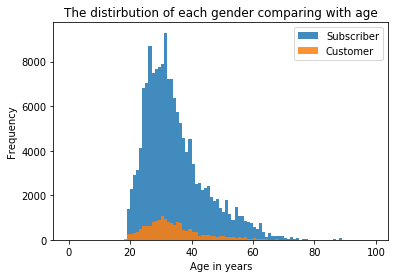

In [131]:
#Plotting historam for two times.
for user_type in bikes_df_cleaned.user_type.value_counts().index:
    hist_c(user_type)

plt.legend(['Subscriber', 'Customer'])
plt.xlabel('Age in years')
plt.title('The distirbution of each gender comparing with age');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship between age and trip time can be clearly seen from the scatter plot, however the correlation coeffient for these two was almost zero, which highlight the benefit of visualizations. The comparison between male and female came out after all very similar comparing with different variables only minor differences only.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, when comparing the age between subscribers and customers, we noticed a higher frequency in subscribers comparing with customers, subscribers age is highly distirbuted between 20 and 60, while customers are usually between the age of 20 to 40.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Multivariate Question 1 - How 'member_gender', 'duration_sec' and 'member_birth_year' intract with each other? 

In [30]:
#Using two lists to add ranges of the data instead of plotting all years.
ages_range = []
ages = (2019 - bikes_df_cleaned['member_birth_year'])
ages_range = np.where((ages > 18) & (ages <= 30), '18-30', np.nan)
ages_range = np.append(ages_range, np.where((ages > 30) & (ages <= 50), '30-50', np.nan))
ages_range = np.append(ages_range, np.where((ages > 50) & (ages <= 70), '50-70', np.nan))
ages_range = np.append(ages_range, np.where((ages > 70), '70+', np.nan))
ages_range = ages_range[ages_range != 'nan']

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1518: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3652 but corresponding boolean dimension is 3498
  stat_data = remove_na(group_data[hue_mask])
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1518: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 40844 but corresponding boolean dimension is 39023
  stat_data = remove_na(group_data[hue_mask])
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1518: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 130651 but corresponding boolean dimension is 124736
  stat_data = remove_na(group_data[hue_mask])


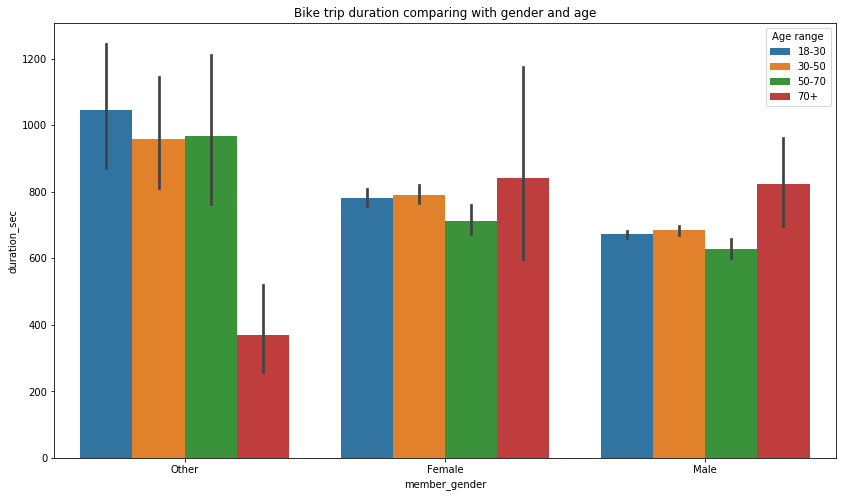

In [141]:
plt.figure(figsize=(14,8))
chart = sns.barplot(data = bikes_df_cleaned, x = 'member_gender', y = 'duration_sec', hue = ages_range,
                    order = ['Other', 'Female', 'Male']);
chart.legend(title = 'Age range');
plt.title('Bike trip duration comparing with gender and age');

In [143]:
#Checking the member with gender programmatically.
bikes_df_cleaned.groupby('member_gender')['duration_sec'].mean().sort_values()

member_gender
Male      672.639069
Female    779.070390
Other     996.515334
Name: duration_sec, dtype: float64

### Multivariate Question 2 - How 'member_gender', 'duration_sec' and 'user_type' intract with each other? 

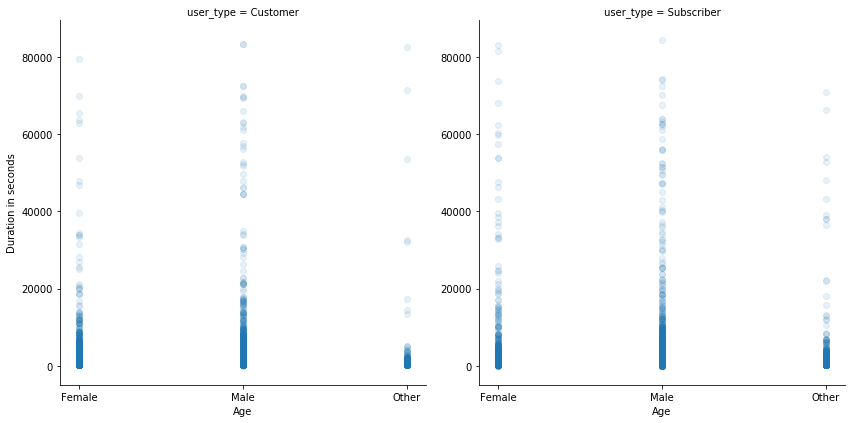

In [35]:
scatters = sns.FacetGrid(size = 6, data = bikes_df_cleaned, col = 'user_type')
scatters.map(plt.scatter, 'member_gender', 'duration_sec', alpha = 0.1)
scatters.set_xlabels('Age')
scatters.set_ylabels('Duration in seconds')

plt.show()

### Multivariate Question 3 - Within the top 20 start stations, how's 'member_gender' and 'user_type' are distirbuted?

In [36]:
#Filtering data to subscribers and customers.
filtered_s = bikes_df_cleaned[(bikes_df_cleaned['user_type'] == 'Subscriber') & (bikes_df_cleaned['start_station_name'].isin(
    bikes_df_cleaned['start_station_name'].value_counts().head(10).index))]

filtered_c = bikes_df_cleaned[(bikes_df_cleaned['user_type'] == 'Customer') & (bikes_df_cleaned['start_station_name'].isin(
    bikes_df_cleaned['start_station_name'].value_counts().head(10).index))]

In [37]:
#Function to plot countplot.
def countplot(data, title):
    stations = data.start_station_name.value_counts().head(10).index
    plt.figure(figsize=(16,12))
    sns.countplot(data = data, y = 'start_station_name', hue = 'member_gender',
                  palette ={'Male': 'blue', 'Female': 'red', 'Other': 'green'}, hue_order = data.member_gender.value_counts().index,
                 order = stations)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Start station name')
    plt.legend(loc = 'lower right')
    plt.show();

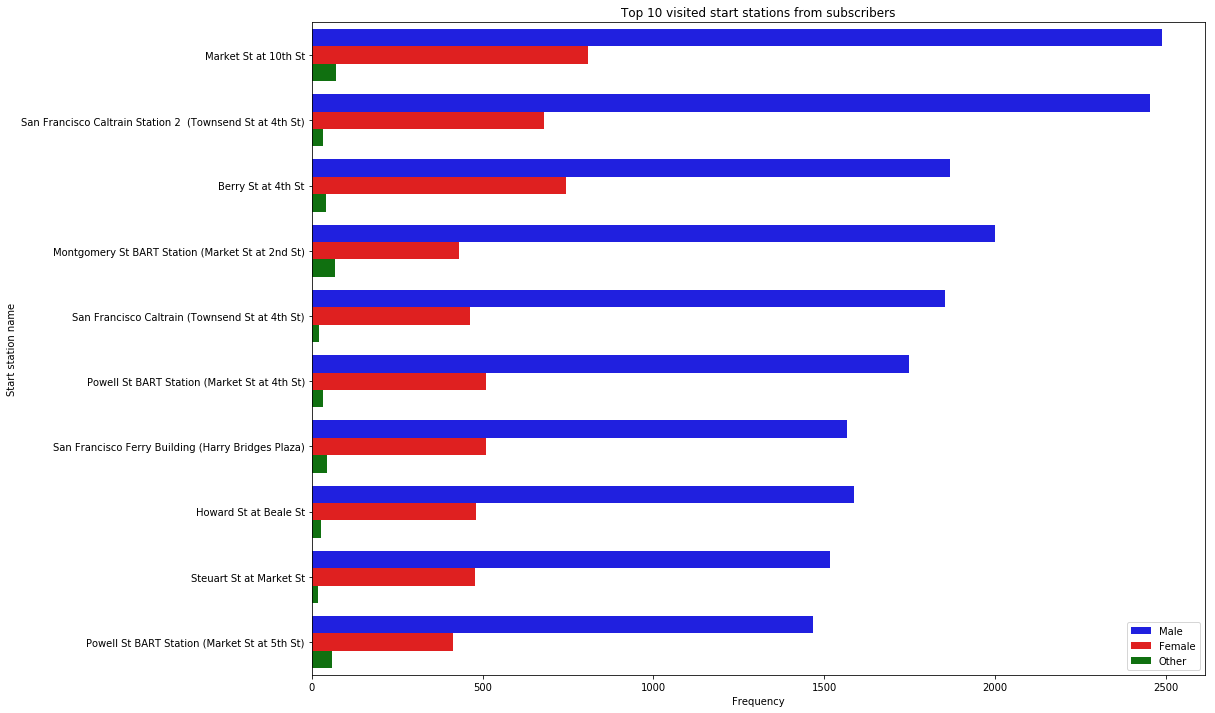

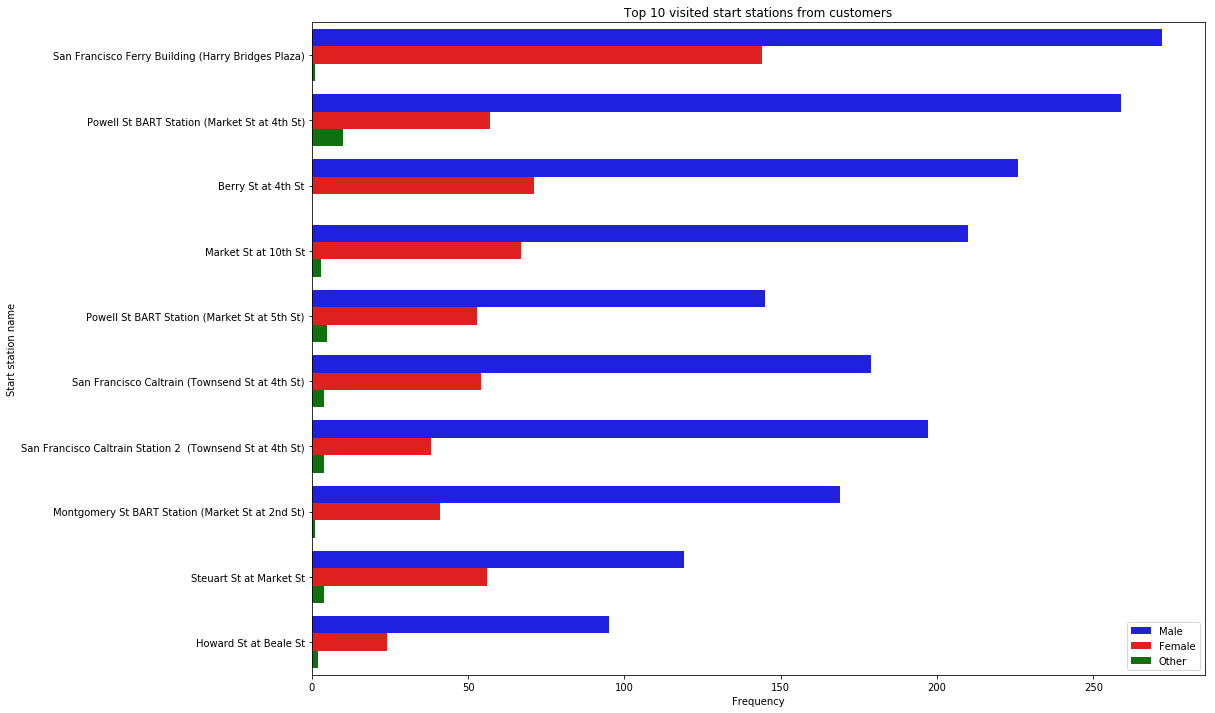

In [31]:
countplot(filtered_s, 'Top 10 visited start stations from subscribers')
countplot(filtered_c, 'Top 10 visited start stations from customers')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes, we can see that other genders than males and females always have unsteady pattern when we talk in term of time regardless if they subscribers or customers,  while males and females almost similar trip duration pattern whether they were subscribers or customers.
<br>
> 
### Were there any interesting or surprising interactions between features?

> There was, according to our visualizations in Bivariate Question 3, we saw that males have high frequency in our data, however, when we see the bar chart in Multivariate Question 1 we see that even with males have much higher frequency, females duration trips always longer than males by a noticable difference across all ages.
<br>
> Also, the age range of 70+ was surprisingly high with males and females which was not expected comparing with the duration_sec variable.

## Conclusions
><b> We found out that different visualization can be helpful to view some sides of the insights but not all of them, like the frequency of a specific gender even if it go so high that doesn't mean the other variables for that gender would be higher too, the importance of plotting different visualization with different variables since descriptive statistcs and some visualizations may not show the full truth behind the data.</b>